In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as datetime
from scipy.stats import skew

# 1. Load the data

In [3]:
# load the price data and client data
price_data = pd.read_csv("C:/Users/yongw/Downloads/price_data.csv")
client_data = pd.read_csv("C:/Users/yongw/Downloads/client_data.csv")

In [4]:
price_data.head()  

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
client_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0  6/15/2013  6/15/2016   
1      4660             0                0  8/21/2009  8/30/2016   
2       544             0                0  4/16/2010  4/16/2016   
3      1584             0                0  3/30/2010  3/30/2016   
4      4425             0              526  1/13/2010   3/7/2016   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0       11/1/2015    6/23/2015               0.00  ...        t      0.00   
1       8/21/2009    8/31/2015             189.95  ...        f      0.00   
2       4/16/2010    4/17/2015              47.96  ...        f      0.00   
3       3/30/2010    3/31/2015             240.04  ...        f      0.00   
4       1/13/2010     3/9/2015             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

 # 2. Descriptive Statistics of Data

## 2.1 Data types

In [6]:
## look at data types for each column
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

## 2.2 Statistics

In [8]:
price_data.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

In [9]:
client_data.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

## 2.3 Data Visualization

In [10]:
def plot_stacked_bars(data, title_, size_=(18,10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = data.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )
    
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    
    # Labels
    plt.ylabel('Company base (%)')
    plt.show()
    

def annotate_stacked_bars(ax, pad=0.99, color="white", textsize=13):
    """
    Add value annotations to the bars
    """
    
    # iterate over the plotted rectanges/bars
    for p in ax.patches:
        # calculate the value for p
        value = str(round(p.get_height() ,1))
        
        if value == 0.0:
            continue
            
        # add annotate to the plot
        ax.annotate(
            text = value,
            xy = ((p.get_x()+p.get_width()/2)*pad, (p.get_y()+p.get_height()/2)),
            fontsize = textsize,
            color=color
        )
        
        
def plot_distribution(data, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    
    # calculate retention and churn rate and creat a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": data[data["churn"]==0][column],
    "Churn":data[data["churn"]==1][column]})
    
    # plot the histgram
    hist = temp[["Retention", "Churn"]].plot(
        kind = "hist",
        stacked = True,
        bins = bins_,
        ax = ax
        )
    
    # X-axis label
    ax.set_xlabel(column)
    
    # change the x-axis to plain style to disable scientific notation
    ax.ticklabel_format(style = "plain", axis = "x")

    # add a title
    ax.set_title(f'Distribution of {column} for Retention and Churn')

In [11]:
# using [["",""]] to select multiple columns and make it a data frame
churn = client_data[["id", "churn"]]

# rename column
churn.columns = ["Companies","churn"]

churn.head()

Companies  churn
0  24011ae4ebbe3035111d65fa7c15bc57      1
1  d29c2c54acc38ff3c0614d0a653813dd      0
2  764c75f661154dac3a6c254cd082ea7d      0
3  bba03439a292a1e166f80264c16191cb      0
4  149d57cf92fc41cf94415803a877cb4b      0

In [12]:
# group by churn getting number of sample in 0 and 1
churn_total = churn.groupby(churn["churn"]).count()
print(churn_total)

       Companies
churn           
0          13187
1           1419


In [13]:
rate = churn_total / churn_total.sum() * 100
print(rate)
# use transpose to make it 1 row by 2 columns, in doing so to make it stacked bar plot
# stacked plot should be in one row
rate.transpose()  

       Companies
churn           
0      90.284814
1       9.715186


churn              0         1
Companies  90.284814  9.715186

## 2.3.1 Total churn rate

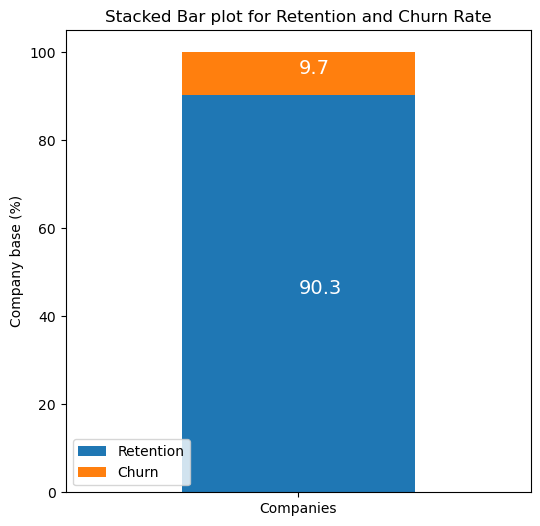

In [14]:
title_ = "Stacked Bar plot for Retention and Churn Rate"
# size =(width, height)
plot_stacked_bars(rate.transpose(), title_, (6,6), legend_="lower left")

In [15]:
client_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

## 2.3.2 churn rate by consumption in 12 month

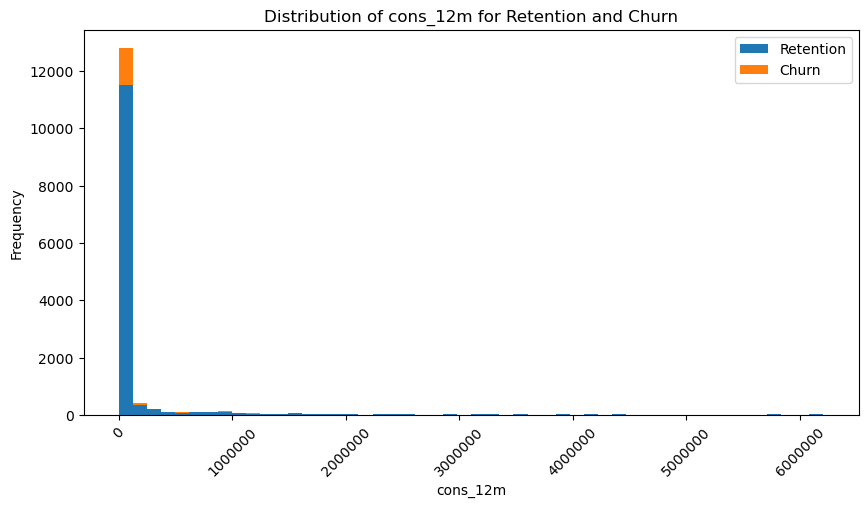

In [16]:
## plot distribution by cons_12m
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (10,5))

distribution_data = client_data[["id","channel_sales","cons_12m","has_gas","churn"]]

#plot_distribution(distribution_data, column = "channel_sales", ax=axs[0], bins_=50)
plot_distribution(distribution_data, column = "cons_12m", ax=axs, bins_=50)
axs.tick_params(axis="x", rotation=45)





## 2.3.3 churn rate by Sales Channel

In [17]:
## calculate churn rate by sale channel
churn_sale = client_data[["id","channel_sales","churn"]]
churn_sale.head()

print(churn_sale["channel_sales"].nunique())  # use nunique() to count how many different distinct values


## calculate the rate
## unstack(level=1), makeing index at first level as column name
churn_rate = churn_sale.groupby([churn_sale["channel_sales"],churn_sale["churn"]])["id"].count().unstack(level=1).fillna(0)
print(churn_rate.sum(axis=1))  ## A.div(B, axis=0) A/B by row, axis=1 by column
# churn or retention counts / sum of churn and retention counts
churn_rate_channel = (churn_rate.div(churn_rate.sum(axis=1),axis=0)*100).sort_values(by=1, ascending=False) 
print(churn_rate_channel.head())

8
channel_sales
MISSING                             3725.0
epumfxlbckeskwekxbiuasklxalciiuu       3.0
ewpakwlliwisiwduibdlfmalxowmwpci     893.0
fixdbufsefwooaasfcxdxadsiekoceaa       2.0
foosdfpfkusacimwkcsosbicdxkicaua    6754.0
lmkebamcaaclubfxadlmueccxoimlema    1843.0
sddiedcslfslkckwlfkdpoeeailfpeds      11.0
usilxuppasemubllopkaafesmlibmsdf    1375.0
dtype: float64
churn                                     0          1
channel_sales                                         
foosdfpfkusacimwkcsosbicdxkicaua  87.859046  12.140954
usilxuppasemubllopkaafesmlibmsdf  89.963636  10.036364
ewpakwlliwisiwduibdlfmalxowmwpci  91.601344   8.398656
MISSING                           92.402685   7.597315
lmkebamcaaclubfxadlmueccxoimlema  94.411286   5.588714


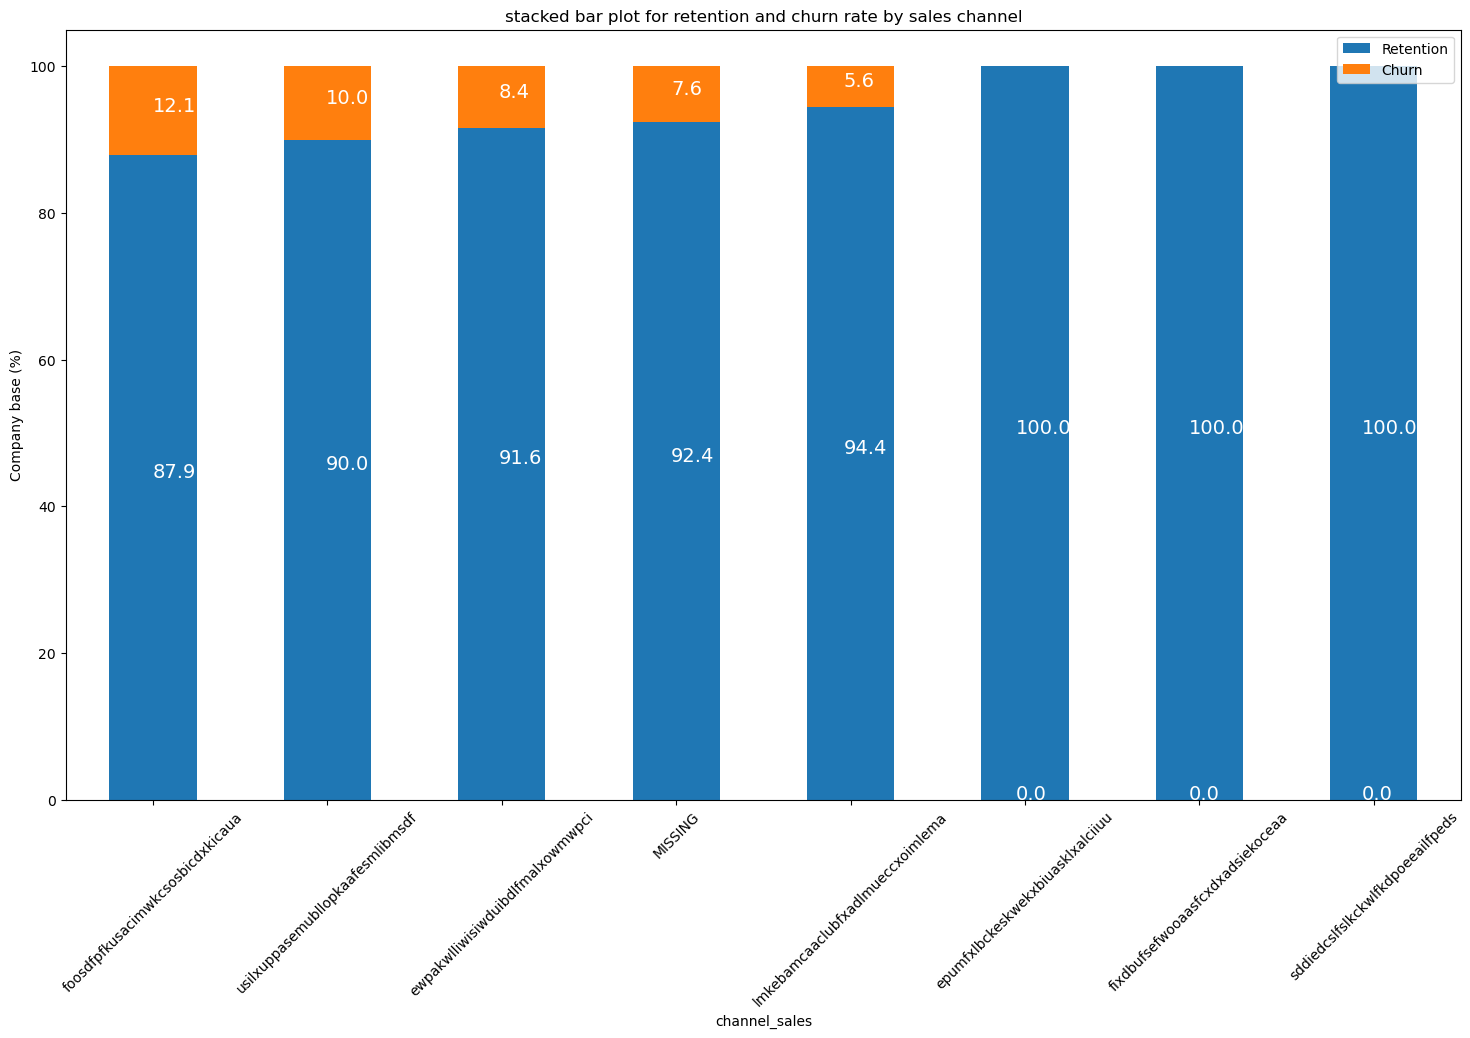

In [18]:
title = "stacked bar plot for retention and churn rate by sales channel"
plot_stacked_bars(churn_rate_channel, title, rot_=45)

churning customers are distributed over 5 channels. 

## 2.3.4 Consumption

In [19]:
consumption = client_data[["id","cons_12m","cons_gas_12m","cons_last_month","imp_cons","has_gas","churn"]]

In [20]:
temp = pd.DataFrame({"Retention": consumption[consumption["churn"]==0]["cons_12m"],
                     "Churn":consumption[consumption["churn"]==1]["cons_12m"]})
temp.fillna(0).head()

Retention  Churn
0        0.0    0.0
1     4660.0    0.0
2      544.0    0.0
3     1584.0    0.0
4     4425.0    0.0

In [21]:
## use histgram to visulize numerical consumption data
## we are gping to plot four pictures, we should pass ax directly instead of being reassigned.
## pass ax argument if we want to creata a large picture contaning subplots
## assign ax within function if we want to make a standalone plot

def hist_plot(data,column, ax, bins_=50 ):
    """
    Plot variable distribution in a stacked histgram of churned or retained company
    """
    
    # create a temporal dataframe to be plot, by column summarize number of churn and retention id
    temp = pd.DataFrame({"Retention": data[data["churn"]==0][column],
                         "Churn":data[data["churn"]==1][column]}) 
    
    #plot the histgram
    temp.plot(kind="hist", bins=bins_, ax=ax, stacked=True)
    
    # add X label
    ax.set_xlabel(column)
    
    # change x label to plain style
    ax.ticklabel_format(style="plain",axis="x")
    

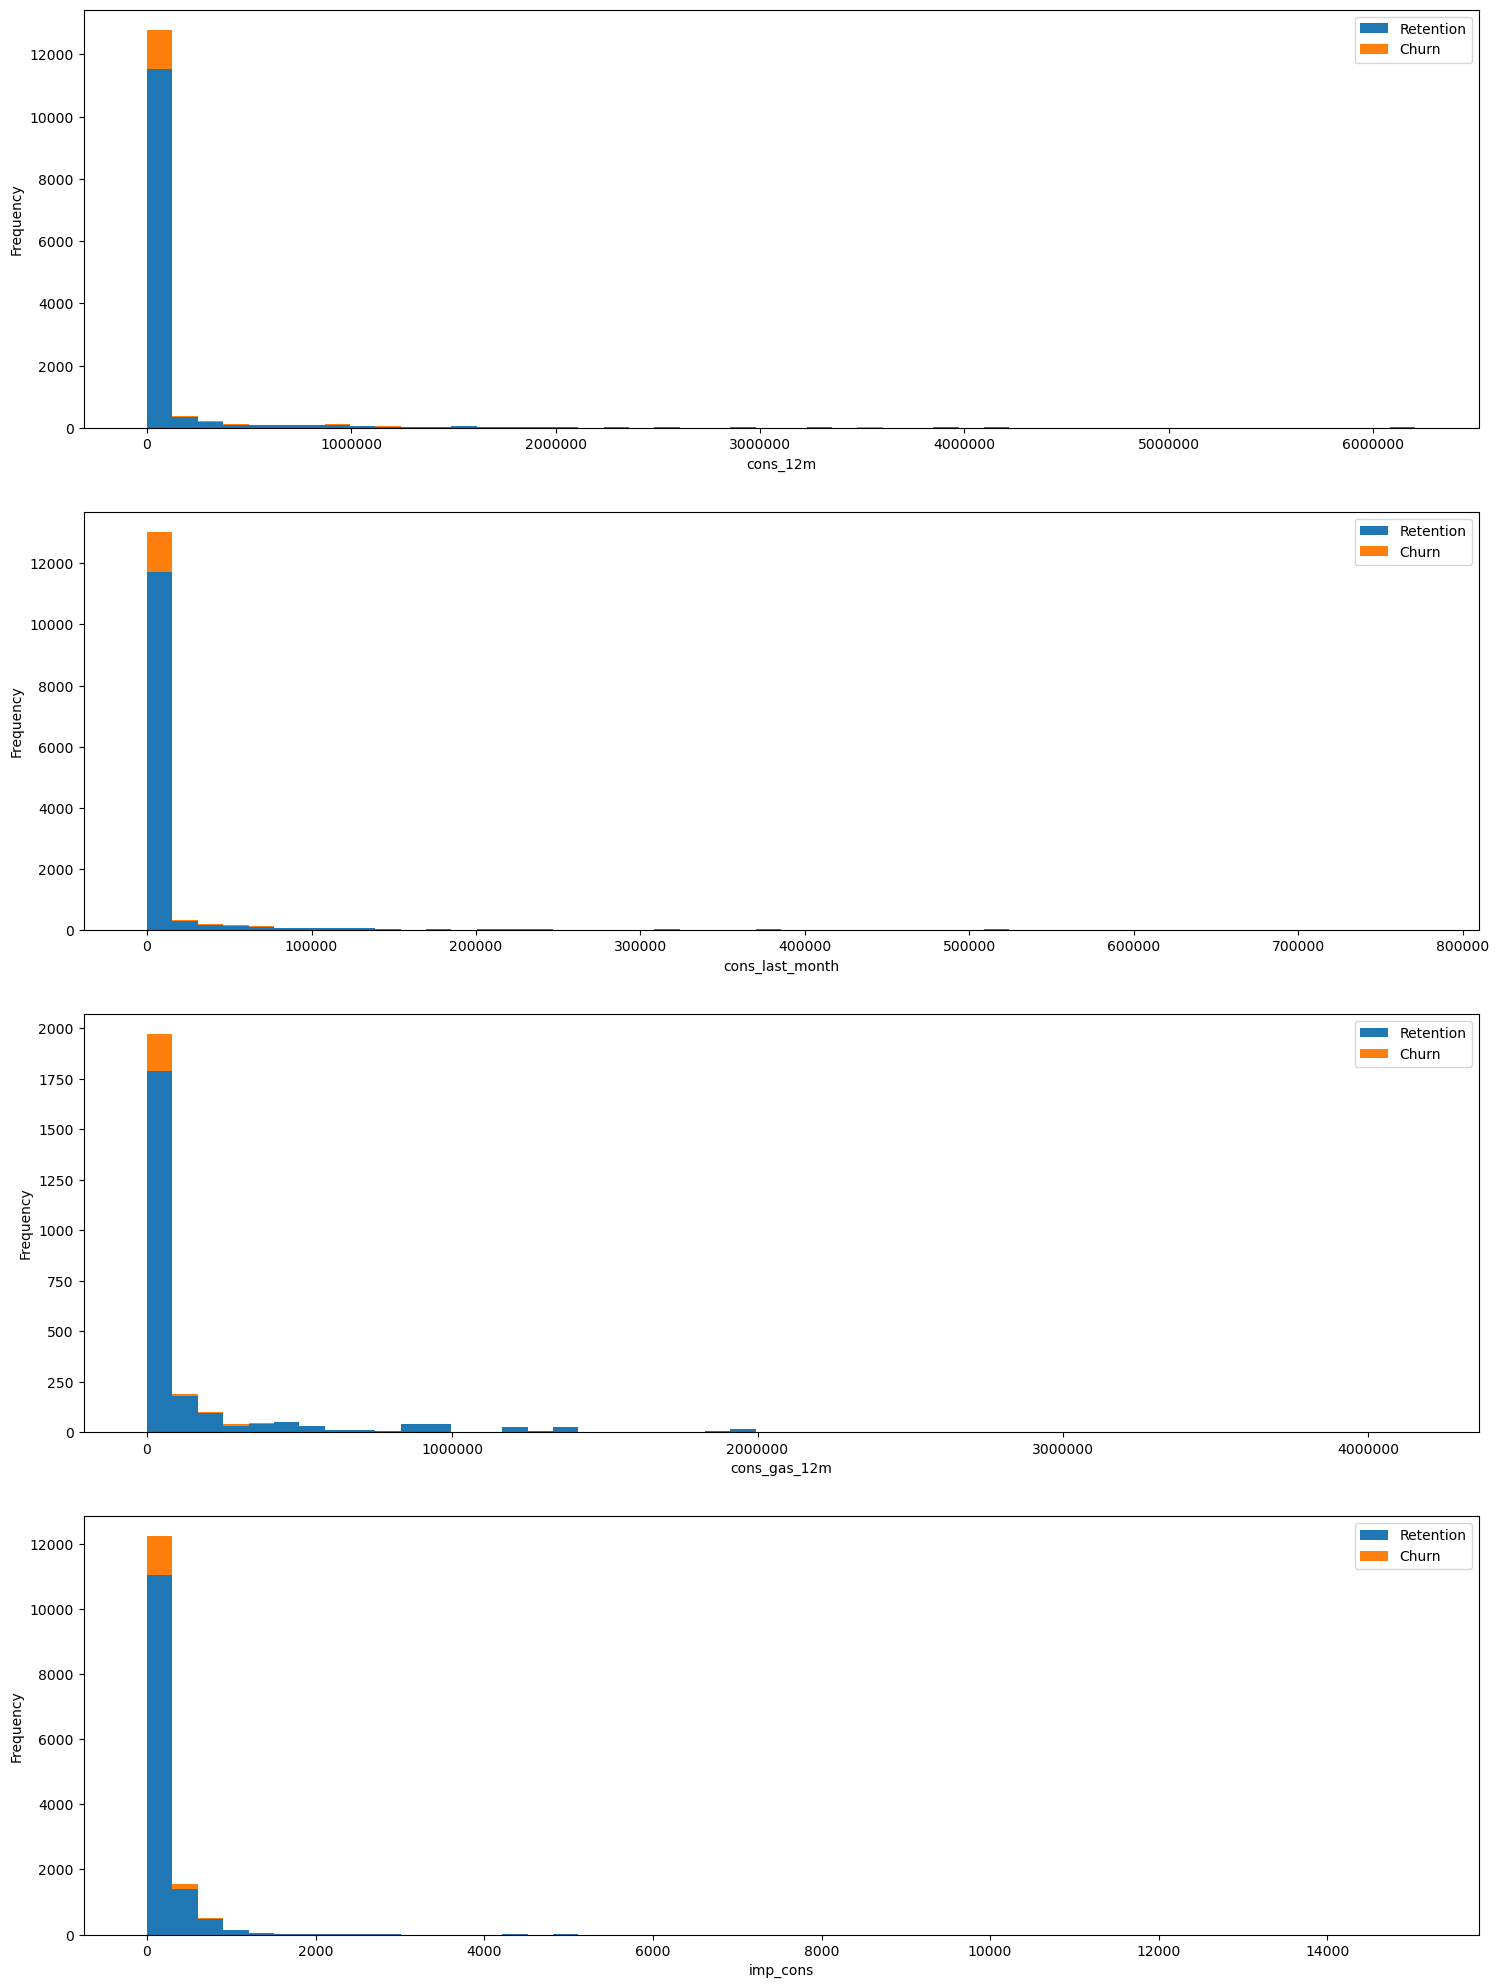

In [22]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25)) 

hist_plot(consumption,column="cons_12m", ax=axs[0])
hist_plot(consumption,"cons_last_month",ax=axs[1])
hist_plot(consumption[consumption["has_gas"]=="t"],"cons_gas_12m",ax=axs[2])
hist_plot(consumption,"imp_cons",ax=axs[3])

## 2.3.5 Contract Plot (has_gas)

In [23]:
## group by has_gas, count id 
contract = client_data[["id","has_gas","churn"]]
contract_rate = contract.groupby([contract["has_gas"],contract["churn"]])["id"].count().unstack(level=1)
rate = (contract_rate.div(contract_rate.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)
rate

churn            0          1
has_gas                      
f        89.945629  10.054371
t        91.814410   8.185590

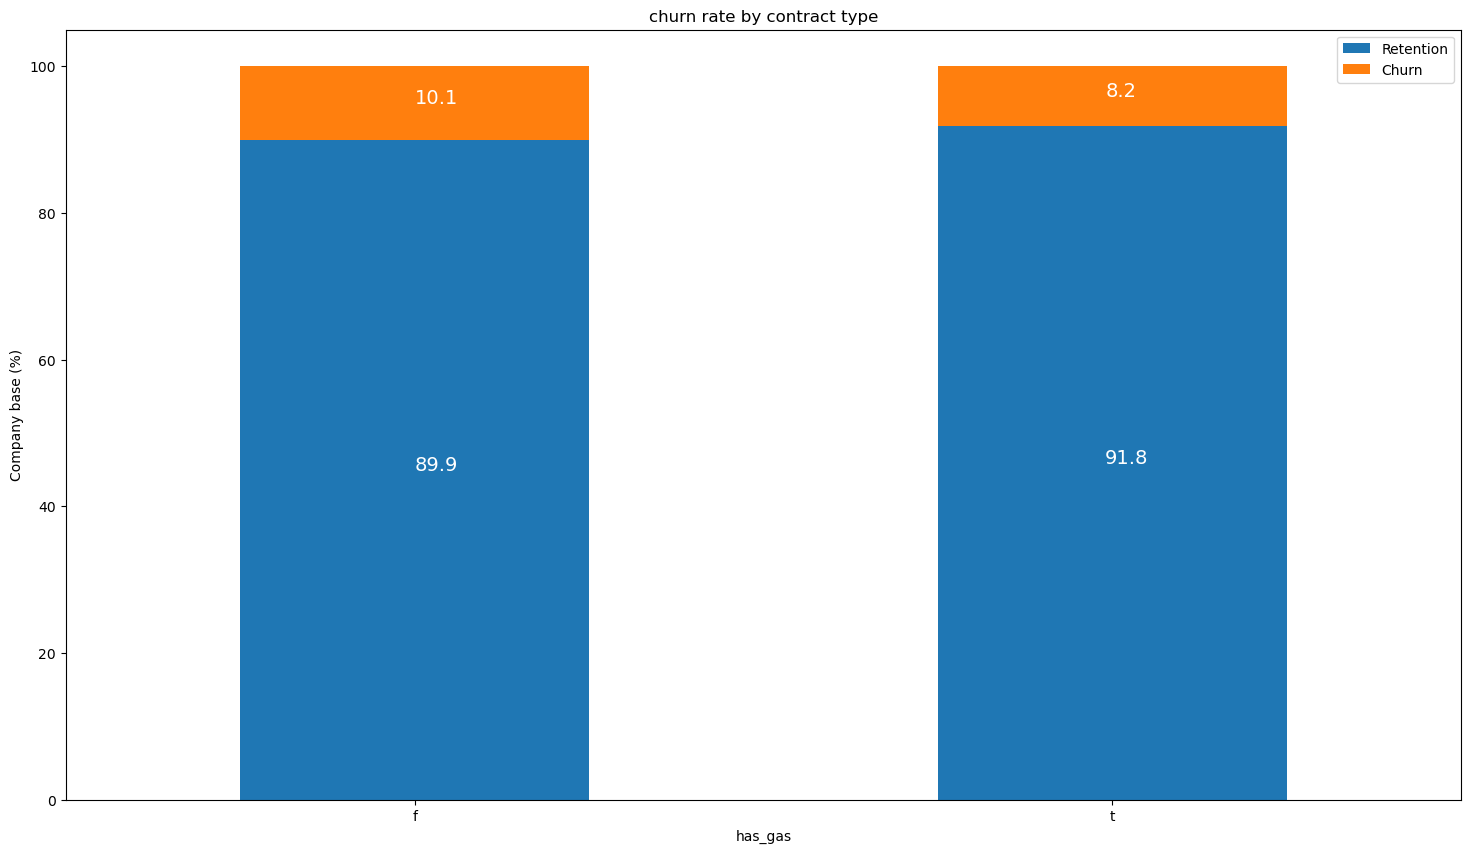

In [24]:
# plot_stacked_bars(data, title_, size_=(18,10), rot_=0, legend_="upper right")
plot_stacked_bars(rate, "churn rate by contract type")


## 2.3.6 Margins (box plot)

In [25]:
margin = client_data[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

Text(0.5, 0, 'net_margin')

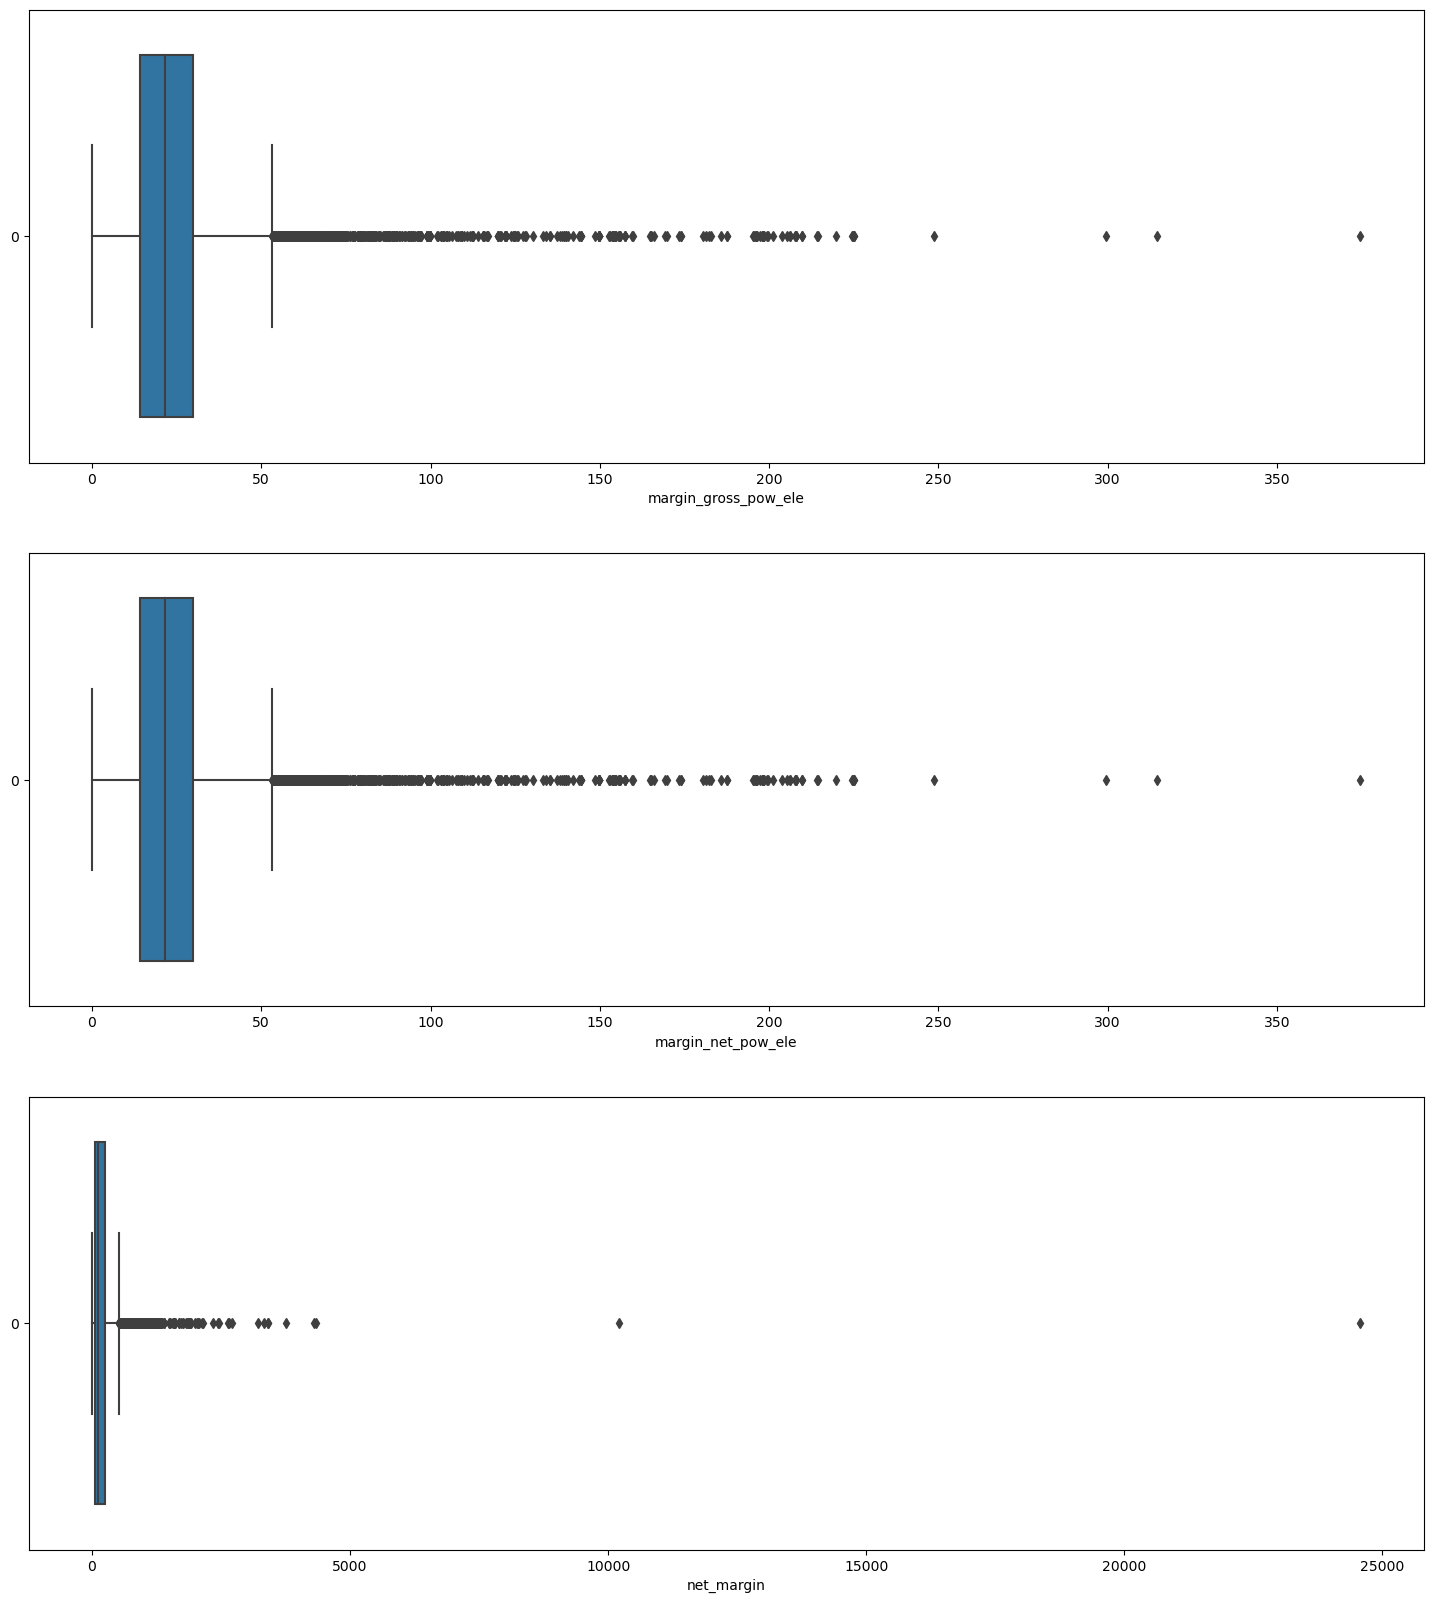

In [26]:
fig, axs = plt.subplots(nrows = 3, figsize = (18,20))

sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0], orient="h")
sns.boxplot(margin["margin_net_pow_ele"], ax=axs[1], orient="h")
sns.boxplot(margin["net_margin"], ax=axs[2], orient="h")

axs[0].ticklabel_format(style="plain",axis="x")
axs[0].set_xlabel("margin_gross_pow_ele")
axs[1].set_xlabel("margin_net_pow_ele")
axs[2].set_xlabel("net_margin")


## 2.3.7 Subscribed power

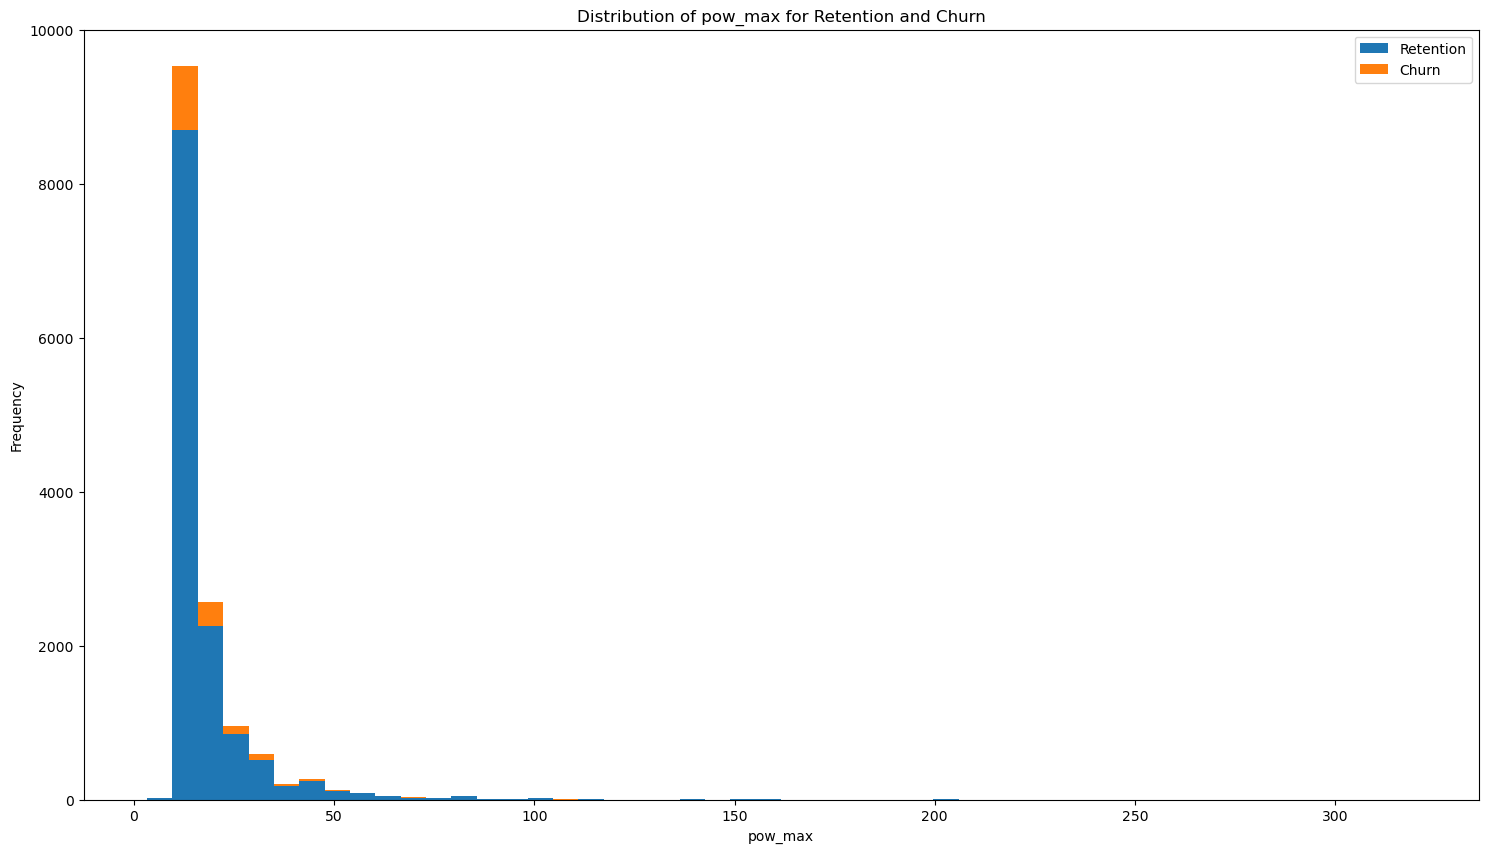

In [27]:
power = client_data[["id","pow_max","churn"]]  ## use hist_plot
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
column = "pow_max"
plot_distribution(power, column, axs)

## 2.3.8 Other columns

In [28]:
others = client_data[["id","nb_prod_act","num_years_antig","origin_up","churn"]]

In [29]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_rate = (products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)
products_rate

churn                 0          1
nb_prod_act                       
4             90.000000  10.000000
1             90.018371   9.981629
3             90.057361   9.942639
5             90.322581   9.677419
2             91.492843   8.507157
6            100.000000        NaN
8            100.000000        NaN
9            100.000000        NaN
10           100.000000        NaN
32           100.000000        NaN

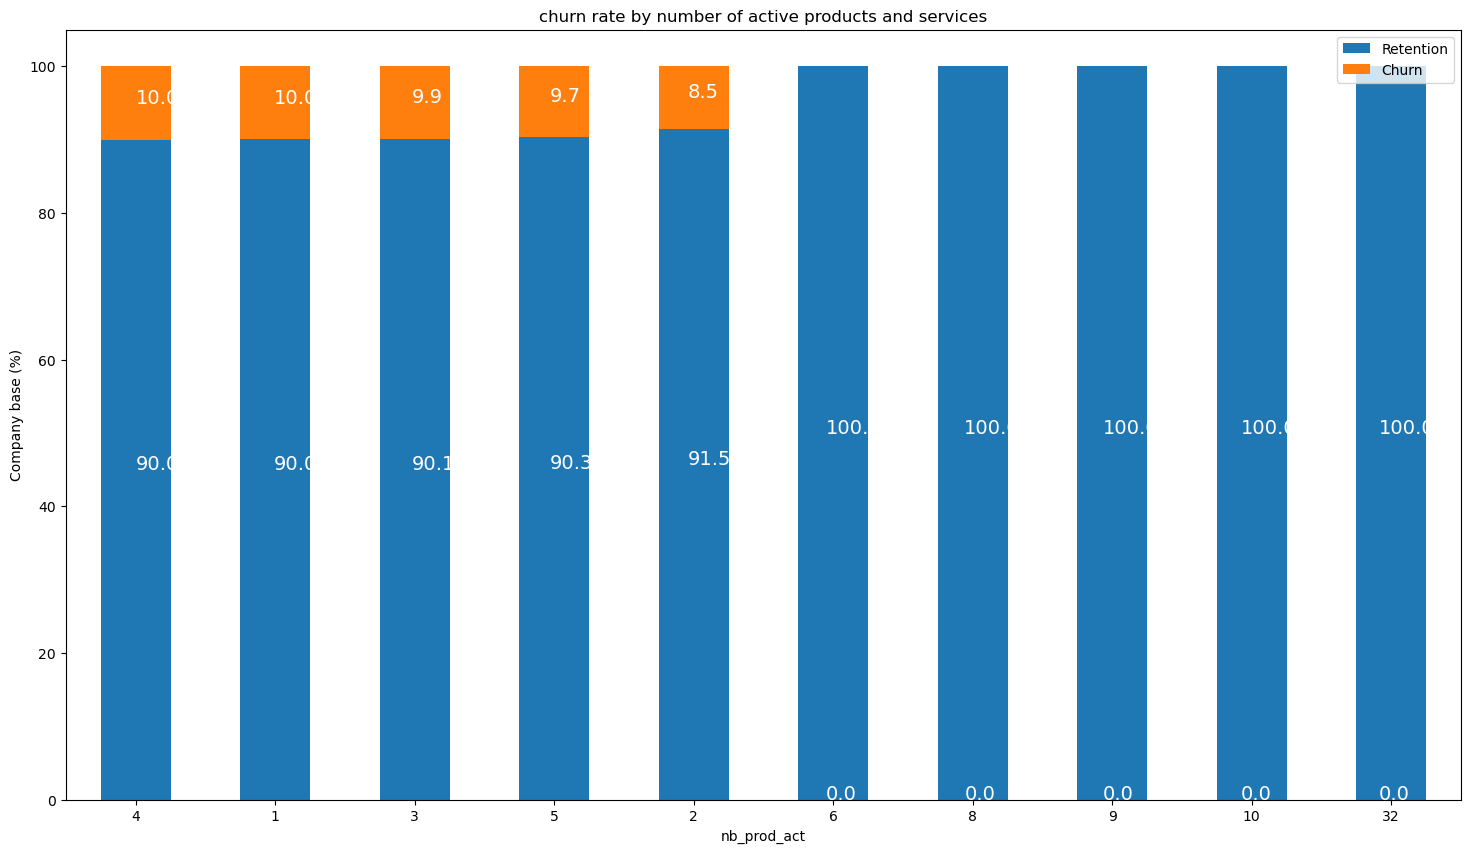

In [30]:
plot_stacked_bars(products_rate, "churn rate by number of active products and services")

In [31]:
years = others.groupby([others["num_years_antig"], others["churn"]])["id"].count().unstack(level=1).fillna(0)
years_rate = ((years.div(years.sum(axis=1),axis=0))*100).sort_values(by=["num_years_antig"],ascending=True)
years_rate


churn                     0          1
num_years_antig                       
1                100.000000   0.000000
2                 72.727273  27.272727
3                 86.477600  13.522400
4                 88.146660  11.853340
5                 91.368148   8.631852
6                 92.891592   7.108408
7                 91.748527   8.251473
8                 95.145631   4.854369
9                 98.913043   1.086957
10                95.061728   4.938272
11                93.513514   6.486486
12                90.000000  10.000000
13                92.307692   7.692308

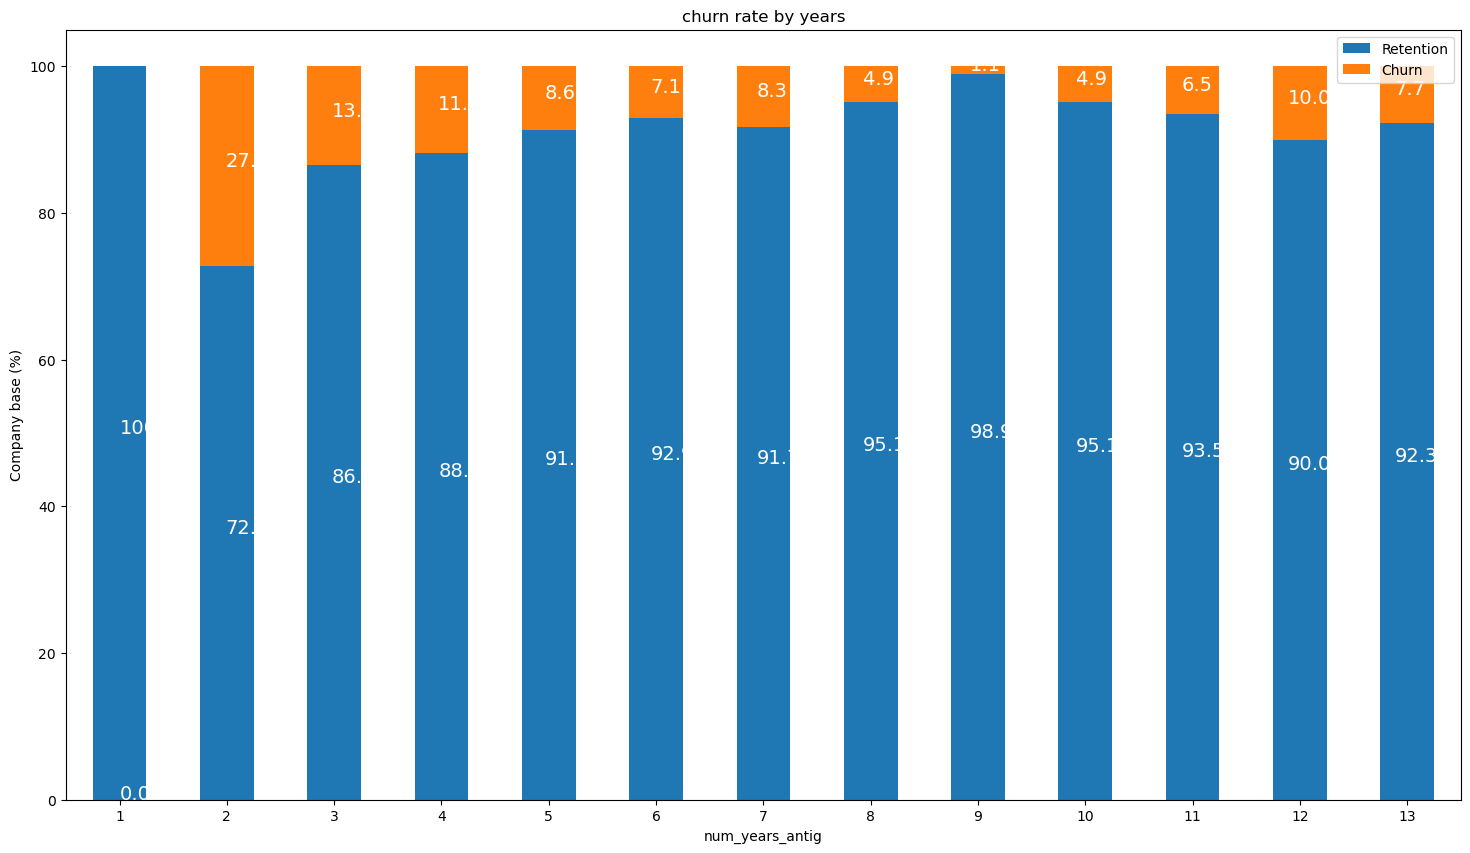

In [32]:
plot_stacked_bars(years_rate, "churn rate by years")

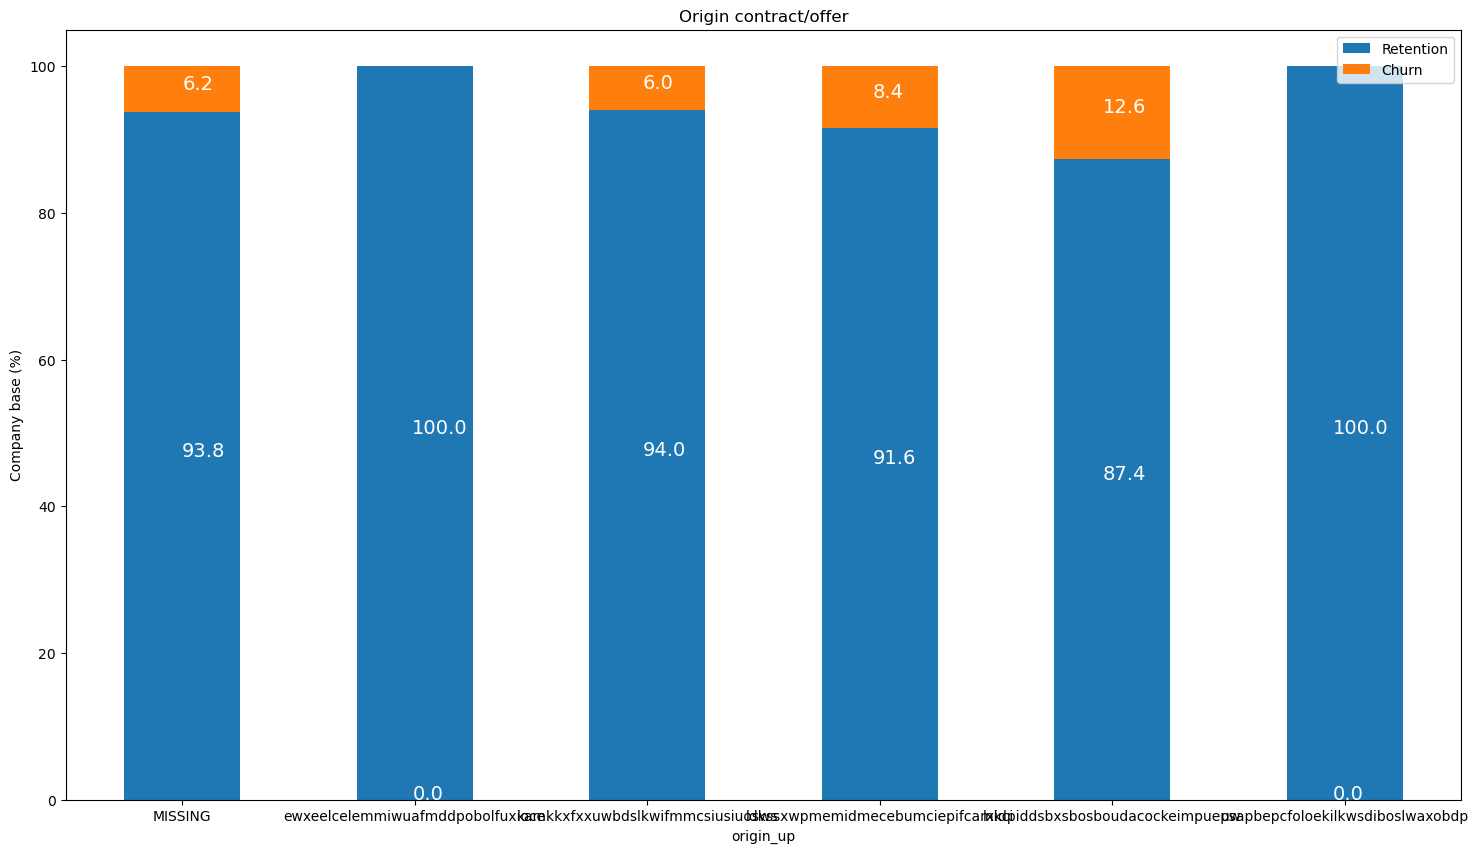

In [33]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# Feature engineering

In [34]:
df = pd.read_csv("C:/Users/yongw/Downloads/clean_data_after_eda.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [35]:
## change date format from object to datetime
df["date_activ"] = pd.to_datetime(df["date_activ"], format="%Y-%m-%d")
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format="%Y-%m-%d")
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format="%Y-%m-%d")
df["date_end"] = pd.to_datetime(df["date_end"], format="%Y-%m-%d")

df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

## Difference between off-peak prices in Dec and preceding January

In [36]:
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format="%Y-%m-%d")
price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [37]:
# group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby([price_data["id"],price_data["price_date"]]).agg({"price_off_peak_var":"mean",
                                                                                                   "price_off_peak_fix":"mean", 
                                                                                                   "price_mid_peak_var":"mean", 
                                                                                                   "price_mid_peak_fix":"mean", 
                                                                                                   "price_peak_var":"mean", 
                                                                                                   "price_peak_fix":"mean"}).reset_index()
monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  price_mid_peak_var  price_mid_peak_fix  price_peak_var  \
0           40.565969            0.070232           16.226389        0.103975   
1           40.565969            0.070232           16.226389        0.103975   
2           40.728885            0.073773           16.291555        0.105842   
3           40.728885            0.073773           16.291555        0.105842   
4           40.728885            0.073773           16.291555        0.105842   

   price_peak_fix  
0       24.339581  
1       24.339581  
2       24.437330  
3       24.437330  
4       24.437330

In [38]:
# get january and december prices for each companies 
jan_prices = monthly_price_by_id.groupby("id").first().reset_index()
dec_prices = monthly_price_by_id.groupby("id").last().reset_index()
dec_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
1  0004351ebdd665e6ee664792efc4fd13 2015-12-01            0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01            0.201280   
3  0010ee3855fdea87602a5b7aba8e42de 2015-12-01            0.113068   
4  00114d74e963e47177db89bc70108537 2015-12-01            0.145440   

   price_off_peak_fix  price_mid_peak_var  price_mid_peak_fix  price_peak_var  \
0           40.728885            0.073719           16.291555        0.101673   
1           44.444710            0.000000            0.000000        0.000000   
2           45.944710            0.000000            0.000000        0.000000   
3           40.728885            0.069409           16.291555        0.095385   
4           44.266930            0.000000            0.000000        0.000000   

   price_peak_fix  
0        24.43733  
1         0.00000  
2         0.00000  
3        24.43733  
4         0.00000

In [39]:
# calculate the difference, December - January
diff = pd.merge(dec_prices.rename(columns={"price_off_peak_var":"dec_price_off_peak_var",
                                           "price_off_peak_fix":"dec_price_off_peak_fix",
                                           "price_mid_peak_var":"dec_price_mid_peak_var",
                                           "price_mid_peak_fix":"dec_price_mid_peak_fix", 
                                           "price_peak_var":"dec_price_peak_var",
                                           "price_peak_fix":"dec_price_peak_fix"}),
                jan_prices.drop(columns="price_date").rename(columns={"price_off_peak_var":"jan_price_off_peak_var", 
                                                                      "price_off_peak_fix":"jan_price_off_peak_fix",
                                                                      "price_mid_peak_var":"jan_price_mid_peak_var",
                                                                      "price_mid_peak_fix":"jan_price_mid_peak_fix",
                                                                      "price_peak_var":"jan_price_peak_var",
                                                                      "price_peak_fix":"jan_price_peak_fix"}), on="id")
diff["offpeak_diff_dec_jan_energy"] = diff["dec_price_off_peak_var"] - diff["jan_price_off_peak_var"]
diff["offpeak_diff_dec_jan_power"] = diff["dec_price_off_peak_fix"] - diff["jan_price_off_peak_fix"]
diff["midpeak_diff_dec_jan_energy"] = diff["dec_price_mid_peak_var"] - diff["jan_price_mid_peak_var"]
diff["midpeak_diff_dec_jan_power"] = diff["dec_price_mid_peak_fix"] - diff["jan_price_mid_peak_fix"]
diff["peak_diff_dec_jan_energy"] = diff["dec_price_peak_var"] - diff["jan_price_peak_var"]
diff["peak_diff_dec_jan_power"] = diff["dec_price_peak_fix"] - diff["jan_price_peak_fix"]

diff.head()

id price_date  dec_price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-12-01                0.119906   
1  0004351ebdd665e6ee664792efc4fd13 2015-12-01                0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01                0.201280   
3  0010ee3855fdea87602a5b7aba8e42de 2015-12-01                0.113068   
4  00114d74e963e47177db89bc70108537 2015-12-01                0.145440   

   dec_price_off_peak_fix  dec_price_mid_peak_var  dec_price_mid_peak_fix  \
0               40.728885                0.073719               16.291555   
1               44.444710                0.000000                0.000000   
2               45.944710                0.000000                0.000000   
3               40.728885                0.069409               16.291555   
4               44.266930                0.000000                0.000000   

   dec_price_peak_var  dec_price_peak_fix  jan_price_off_peak_var  \
0            0.101673            24.43733                0.126098   
1            0.000000             0.00000                0.148047   
2            0.000000             0.00000                0.150837   
3            0.095385            24.43733                0.123086   
4            0.000000             0.00000                0.149434   

   jan_price_off_peak_fix  jan_price_mid_peak_var  jan_price_mid_peak_fix  \
0               40.565969                0.070232               16.226389   
1               44.266931                0.000000                0.000000   
2               44.444710                0.000000                0.000000   
3               40.565969                0.068646               16.226389   
4               44.266931                0.000000                0.000000   

   jan_price_peak_var  jan_price_peak_fix  offpeak_diff_dec_jan_energy  \
0            0.103975           24.339581                    -0.006192   
1            0.000000            0.000000                    -0.004104   
2            0.000000            0.000000                     0.050443   
3            0.100505           24.339581                    -0.010018   
4            0.000000            0.000000                    -0.003994   

   offpeak_diff_dec_jan_power  midpeak_diff_dec_jan_energy  \
0                    0.162916                     0.003487   
1                    0.177779                     0.000000   
2                    1.500000                     0.000000   
3                    0.162916                     0.000763   
4                   -0.000001                     0.000000   

   midpeak_diff_dec_jan_power  peak_diff_dec_jan_energy  \
0                    0.065166                 -0.002302   
1                    0.000000                  0.000000   
2                    0.000000                  0.000000   
3                    0.065166                 -0.005120   
4                    0.000000                  0.000000   

   peak_diff_dec_jan_power  
0                 0.097749  
1                 0.000000  
2                 0.000000  
3                 0.097749  
4                 0.000000

## average price changes across period

This feature depicts, for each company, the mean average price differences across different time periods (off-peak, peak, mid-peak). price sequence: off-peak > peak > mid-peak

In [40]:
price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [41]:
## aggregate mean prices per period for companies
mean_prices = price_data.groupby(["id"]).agg({"price_off_peak_var":"mean",
                                             "price_peak_var":"mean",
                                             "price_mid_peak_var":"mean",
                                             "price_off_peak_fix":"mean",
                                             "price_peak_fix":"mean",
                                             "price_mid_peak_fix":"mean"}).reset_index()
mean_prices.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000

In [42]:
mean_prices["offpeak_peak_mean_price_var"] = mean_prices["price_off_peak_var"] - mean_prices["price_peak_var"]
mean_prices["peak_midpeak_mean_price_var"] = mean_prices["price_peak_var"] - mean_prices["price_mid_peak_var"]
mean_prices["offpeak_midpeak_mean_price_var"] = mean_prices["price_off_peak_var"] - mean_prices["price_mid_peak_var"]

mean_prices["offpeak_peak_mean_price_fix"] = mean_prices["price_off_peak_fix"] - mean_prices["price_peak_fix"]
mean_prices["peak_midpeak_mean_price_fix"] = mean_prices["price_peak_fix"] - mean_prices["price_mid_peak_fix"]
mean_prices["offpeak_midpeak_mean_price_fix"] = mean_prices["price_off_peak_fix"] - mean_prices["price_mid_peak_fix"]

In [43]:
mean_prices.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  \
0            0.073160           40.701732       24.421038           16.280694   
1            0.000000           44.385450        0.000000            0.000000   
2            0.000000           45.319710        0.000000            0.000000   
3            0.069032           40.647427       24.388455           16.258971   
4            0.000000           44.266930        0.000000            0.000000   

   offpeak_peak_mean_price_var  peak_midpeak_mean_price_var  \
0                     0.020545                     0.030633   
1                     0.146426                     0.000000   
2                     0.181558                     0.000000   
3                     0.020465                     0.029260   
4                     0.147926                     0.000000   

   offpeak_midpeak_mean_price_var  offpeak_peak_mean_price_fix  \
0                        0.051178                    16.280694   
1                        0.146426                    44.385450   
2                        0.181558                    45.319710   
3                        0.049725                    16.258972   
4                        0.147926                    44.266930   

   peak_midpeak_mean_price_fix  offpeak_midpeak_mean_price_fix  
0                     8.140345                       24.421038  
1                     0.000000                       44.385450  
2                     0.000000                       45.319710  
3                     8.129484                       24.388456  
4                     0.000000                       44.266930

## max mean monthly price changes for companies

In [46]:
price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [47]:
## 1. get monthly mean price for all types of prices per company
## 2. calculate the differences for mean prices
## 3. extract the maximum monthly differences for each type of prices 
monthly_mean = price_data.groupby(["price_date","id"]).agg({"price_off_peak_var":"mean",
                                                            "price_peak_var":"mean",
                                                            "price_mid_peak_var":"mean",
                                                            "price_off_peak_fix":"mean",
                                                            "price_peak_fix":"mean",
                                                            "price_mid_peak_fix":"mean"}).reset_index()
monthly_mean.head(10)

price_date                                id  price_off_peak_var  \
0 2015-01-01  0002203ffbb812588b632b9e628cc38d            0.126098   
1 2015-01-01  0004351ebdd665e6ee664792efc4fd13            0.148047   
2 2015-01-01  0010bcc39e42b3c2131ed2ce55246e3c            0.150837   
3 2015-01-01  0010ee3855fdea87602a5b7aba8e42de            0.123086   
4 2015-01-01  00114d74e963e47177db89bc70108537            0.149434   
5 2015-01-01  00126c87cf78d7604278f0a9adeb689e            0.125976   
6 2015-01-01  0013f326a839a2f6ad87a1859952d227            0.127818   
7 2015-01-01  00184e957277eeef733a7b563fdabd06            0.149204   
8 2015-01-01  001987ed9dbdab4efa274a9c7233e1f4            0.125976   
9 2015-01-01  0019baf3ed1242cd99b3cb592030446f            0.156255   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.103975            0.070232           40.565969       24.339581   
1        0.000000            0.000000           44.266931        0.000000   
2        0.000000            0.000000           44.444710        0.000000   
3        0.100505            0.068646           40.565969       24.339581   
4        0.000000            0.000000           44.266931        0.000000   
5        0.103395            0.071536           40.565969       24.339581   
6        0.105764            0.072089           40.728885       24.437330   
7        0.000000            0.000000           44.266931        0.000000   
8        0.103395            0.071536           40.565969       24.339581   
9        0.000000            0.000000           44.266931        0.000000   

   price_mid_peak_fix  
0           16.226389  
1            0.000000  
2            0.000000  
3           16.226389  
4            0.000000  
5           16.226389  
6           16.291555  
7            0.000000  
8           16.226389  
9            0.000000

In [48]:
## 2: calculate the changes for mean prices 
monthly_mean["offpeak_peak_var"] = monthly_mean["price_off_peak_var"] - monthly_mean["price_peak_var"]
monthly_mean["peak_midpeak_var"] = monthly_mean["price_peak_var"] - monthly_mean["price_mid_peak_var"]
monthly_mean["offpeak_midpeak_var"] = monthly_mean["price_off_peak_var"] - monthly_mean["price_mid_peak_var"]

monthly_mean["offpeak_peak_fix"] = monthly_mean["price_off_peak_fix"] - monthly_mean["price_peak_fix"]
monthly_mean["peak_midpeak_fix"] = monthly_mean["price_peak_fix"] - monthly_mean["price_mid_peak_fix"]
monthly_mean["offpeak_midpeak_fix"] = monthly_mean["price_off_peak_fix"] - monthly_mean["price_mid_peak_fix"]

monthly_mean.head()

price_date                                id  price_off_peak_var  \
0 2015-01-01  0002203ffbb812588b632b9e628cc38d            0.126098   
1 2015-01-01  0004351ebdd665e6ee664792efc4fd13            0.148047   
2 2015-01-01  0010bcc39e42b3c2131ed2ce55246e3c            0.150837   
3 2015-01-01  0010ee3855fdea87602a5b7aba8e42de            0.123086   
4 2015-01-01  00114d74e963e47177db89bc70108537            0.149434   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.103975            0.070232           40.565969       24.339581   
1        0.000000            0.000000           44.266931        0.000000   
2        0.000000            0.000000           44.444710        0.000000   
3        0.100505            0.068646           40.565969       24.339581   
4        0.000000            0.000000           44.266931        0.000000   

   price_mid_peak_fix  offpeak_peak_var  peak_midpeak_var  \
0           16.226389          0.022123          0.033743   
1            0.000000          0.148047          0.000000   
2            0.000000          0.150837          0.000000   
3           16.226389          0.022581          0.031859   
4            0.000000          0.149434          0.000000   

   offpeak_midpeak_var  offpeak_peak_fix  peak_midpeak_fix  \
0             0.055866         16.226389          8.113192   
1             0.148047         44.266931          0.000000   
2             0.150837         44.444710          0.000000   
3             0.054440         16.226389          8.113192   
4             0.149434         44.266931          0.000000   

   offpeak_midpeak_fix  
0            24.339581  
1            44.266931  
2            44.444710  
3            24.339581  
4            44.266931

In [49]:
## 3. get the maximum difference of monthly mean prices across period
max_diff = monthly_mean.groupby(["id"]).agg({"offpeak_peak_var":"max",
                                             "peak_midpeak_var":"max",
                                             "offpeak_midpeak_var":"max",
                                             "offpeak_peak_fix":"max",
                                             "peak_midpeak_fix":"max",
                                             "offpeak_midpeak_fix":"max"}).reset_index().rename(
    columns={"offpeak_peak_var":"offpeak_peak_var_monthly_diff",
            "peak_midpeak_var":"peak_midpeak_var__monthly_diff",
            "offpeak_midpeak_var":"offpeak_midpeak_var_monthly_diff",
             "offpeak_peak_fix":"offpeak_peak_fix_monthly_diff",
             "peak_midpeak_fix":"peak_midpeak_fix_monthly_diff",
             "offpeak_midpeak_fix":"offpeak_midpeak_fix_monthly_diff"})
max_diff.head()

id  offpeak_peak_var_monthly_diff  \
0  0002203ffbb812588b632b9e628cc38d                       0.022225   
1  0004351ebdd665e6ee664792efc4fd13                       0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                       0.205742   
3  0010ee3855fdea87602a5b7aba8e42de                       0.022581   
4  00114d74e963e47177db89bc70108537                       0.149902   

   peak_midpeak_var__monthly_diff  offpeak_midpeak_var_monthly_diff  \
0                        0.033743                          0.055866   
1                        0.000000                          0.148405   
2                        0.000000                          0.205742   
3                        0.031859                          0.054440   
4                        0.000000                          0.149902   

   offpeak_peak_fix_monthly_diff  peak_midpeak_fix_monthly_diff  \
0                      16.291555                       8.145775   
1                      44.444710                       0.000000   
2                      45.944710                       0.000000   
3                      16.291555                       8.145775   
4                      44.266931                       0.000000   

   offpeak_midpeak_fix_monthly_diff  
0                         24.437330  
1                         44.444710  
2                         45.944710  
3                         24.437330  
4                         44.266931

In [50]:
## put all generated features in one table

diff = pd.concat([diff.iloc[:,[0]], diff.iloc[:,-6:]], axis=1) # get first column using brackt making it a df, and last six columns 
diff.head()
mean_prices_columns = pd.concat([mean_prices.iloc[:,[0]], mean_prices.iloc[:,-6:]], axis=1)

df = pd.merge(diff, mean_prices_columns, on="id")
df = pd.merge(df, max_diff, on="id")
df.columns

Index(['id', 'offpeak_diff_dec_jan_energy', 'offpeak_diff_dec_jan_power',
       'midpeak_diff_dec_jan_energy', 'midpeak_diff_dec_jan_power',
       'peak_diff_dec_jan_energy', 'peak_diff_dec_jan_power',
       'offpeak_peak_mean_price_var', 'peak_midpeak_mean_price_var',
       'offpeak_midpeak_mean_price_var', 'offpeak_peak_mean_price_fix',
       'peak_midpeak_mean_price_fix', 'offpeak_midpeak_mean_price_fix',
       'offpeak_peak_var_monthly_diff', 'peak_midpeak_var__monthly_diff',
       'offpeak_midpeak_var_monthly_diff', 'offpeak_peak_fix_monthly_diff',
       'peak_midpeak_fix_monthly_diff', 'offpeak_midpeak_fix_monthly_diff'],
      dtype='object')

In [51]:
data = pd.read_csv("C:/Users/yongw/Downloads/clean_data_after_eda.csv")
data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

In [52]:
features = pd.merge(data, df, on="id")
features.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   offpeak_midpeak_mean_price_var  offpeak_peak_mean_price_fix  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_midpeak_mean_price_fix  offpeak_midpeak_mean_price_fix  \
0                     7.450670                       26.040925   
1                     0.000000                       44.311375   
2                     0.000000                       44.385450   
3                     0.000000                       44.400265   
4                     8.137629                       24.412893   

   offpeak_peak_var_monthly_diff  peak_midpeak_var__monthly_diff  \
0                       0.060550                        0.085483   
1                       0.151367                        0.085483   
2                       0.084587                        0.089162   
3                       0.153133                        0.000000   
4                       0.022225                        0.033743   

  offpeak_midpeak_var_monthly_diff  offpeak_peak_fix_monthly_diff  \
0                         0.146033                      44.266930   
1                         0.151367                      44.444710   
2                         0.172468                      44.444710   
3                         0.153133                      44.444710   
4                         0.055866                      16.291555   

   peak_midpeak_fix_monthly_diff  offpeak_midpeak_fix_monthly_diff  
0                       8.145775                          44.26693  
1                       0.000000                          44.44471  
2                       0.000000                          44.44471  
3                       0.000000                          44.44471  
4                       8.145775                          24.43733  

[5 rows x 62 columns]

## Tenure

how long a company has been a client of PowerCo

In [53]:
features = features.iloc[:, :-1]  ## drop last column

features["tenure"] = (((pd.to_datetime(features["date_end"], format="%Y-%m-%d")) -
                     (pd.to_datetime(features["date_activ"], format="%Y-%m-%d"))) /  np.timedelta64(1, 'Y')).astype(int)
features.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   offpeak_midpeak_mean_price_var  offpeak_peak_mean_price_fix  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_midpeak_mean_price_fix  offpeak_midpeak_mean_price_fix  \
0                     7.450670                       26.040925   
1                     0.000000                       44.311375   
2                     0.000000                       44.385450   
3                     0.000000                       44.400265   
4                     8.137629                       24.412893   

   offpeak_peak_var_monthly_diff  peak_midpeak_var__monthly_diff  \
0                       0.060550                        0.085483   
1                       0.151367                        0.085483   
2                       0.084587                        0.089162   
3                       0.153133                        0.000000   
4                       0.022225                        0.033743   

  offpeak_midpeak_var_monthly_diff  offpeak_peak_fix_monthly_diff  \
0                         0.146033                      44.266930   
1                         0.151367                      44.444710   
2                         0.172468                      44.444710   
3                         0.153133                      44.444710   
4                         0.055866                      16.291555   

   peak_midpeak_fix_monthly_diff  tenure  
0                       8.145775       3  
1                       0.000000       7  
2                       0.000000       6  
3                       0.000000       6  
4                       8.145775       6  

[5 rows x 62 columns]

see churn rate of companies by how many years have been client

In [54]:
features.groupby(["tenure"]).agg({"churn":"mean"}).sort_values(by="tenure", ascending=True)

churn
tenure          
2       0.176471
3       0.143874
4       0.127473
5       0.091999
6       0.075407
7       0.075472
8       0.047244
9       0.012500
10      0.045455
11      0.059783
12      0.083333
13      0.095238

companies which have been client for less than 4 years have higher probability or more likely to churn. 

## Transform date into month 
reference date is Jan 2016 \
number of months active until refernce date \
number of months since last modification until reference date \
number of months of the contract left until reference date \
number of months since last renewal until reference data

In [55]:
def convert_to_month(date_early, date_late):
    """
    Convert date period into number of months
    """
    date_early = pd.to_datetime(date_early, format="%Y-%m-%d")
    date_late = pd.to_datetime(date_late, format="%Y-%m-%d")
    number_of_month = ((date_late - date_early) / np.timedelta64(1,"M")).astype(int)
    
    return number_of_month

In [56]:
reference_date = datetime.datetime(2016, 1, 1)
features["months_activ"] = convert_to_month(date_early = features["date_activ"], date_late = reference_date)
features["months_to_end"] = -convert_to_month(date_early = features["date_end"], date_late = reference_date)
features["months_modif_prod"] = convert_to_month(date_early = features["date_modif_prod"], date_late = reference_date)
features["months_renewal"] = convert_to_month(date_early = features["date_renewal"], date_late = reference_date)
features.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   offpeak_peak_var_monthly_diff  peak_midpeak_var__monthly_diff  \
0                       0.060550                        0.085483   
1                       0.151367                        0.085483   
2                       0.084587                        0.089162   
3                       0.153133                        0.000000   
4                       0.022225                        0.033743   

   offpeak_midpeak_var_monthly_diff  offpeak_peak_fix_monthly_diff  \
0                          0.146033                      44.266930   
1                          0.151367                      44.444710   
2                          0.172468                      44.444710   
3                          0.153133                      44.444710   
4                          0.055866                      16.291555   

   peak_midpeak_fix_monthly_diff  tenure months_activ  months_to_end  \
0                       8.145775       3           30              5   
1                       0.000000       7           74              7   
2                       0.000000       6           67              3   
3                       0.000000       6           67              2   
4                       8.145775       6           70              2   

   months_modif_prod  months_renewal  
0                  1               6  
1                 74               3  
2                 67               8  
3                 67               8  
4                 70               9  

[5 rows x 66 columns]

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to creat some other features that may hold some predictive power.
 
Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature. 

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few days. You could be looking for better deals for when your contract ends, or you might wnat to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. If you're in the middle of your contract, their may be charges if you wanted to leave, detering clients from churning mid-way through their agreement. So, I think months_to_end will be an intertesing feature because it may reveal patterns and behaviors about timing of churn. 

My belief is that if a client has made recent updates to their contract, they are more likely to be satistified or at least they received a level of customer service to update or change their existing services. I believe this to be a postive sign, they are an engaged customer, and so I believe months_modif_prod will be an intertesing feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an intertesing feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitement if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include. 

In [57]:
# we no longer need the datetime columns that we used for feature engineering, so we can drop them
features.info()
remove_columns = ["date_activ",
                 "date_end",
                 "date_modif_prod",
                 "date_renewal"]
features = features.drop(columns = remove_columns)
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                14606 non-null  object 
 1   channel_sales                     14606 non-null  object 
 2   cons_12m                          14606 non-null  int64  
 3   cons_gas_12m                      14606 non-null  int64  
 4   cons_last_month                   14606 non-null  int64  
 5   date_activ                        14606 non-null  object 
 6   date_end                          14606 non-null  object 
 7   date_modif_prod                   14606 non-null  object 
 8   date_renewal                      14606 non-null  object 
 9   forecast_cons_12m                 14606 non-null  float64
 10  forecast_cons_year                14606 non-null  int64  
 11  forecast_discount_energy          14606 non-null  float64
 12  fore

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  offpeak_peak_var_monthly_diff  \
0                        0.114481  ...                       0.060550   
1                        0.145711  ...                       0.151367   
2                        0.165794  ...                       0.084587   
3                        0.146694  ...                       0.153133   
4                        0.116900  ...                       0.022225   

   peak_midpeak_var__monthly_diff offpeak_midpeak_var_monthly_diff  \
0                        0.085483                         0.146033   
1                        0.085483                         0.151367   
2                        0.089162                         0.172468   
3                        0.000000                         0.153133   
4                        0.033743                         0.055866   

   offpeak_peak_fix_monthly_diff  peak_midpeak_fix_monthly_diff  tenure  \
0                      44.266930                       8.145775       3   
1                      44.444710                       0.000000       7   
2                      44.444710                       0.000000       6   
3                      44.444710                       0.000000       6   
4                      16.291555                       8.145775       6   

   months_activ  months_to_end  months_modif_prod months_renewal  
0            30              5                  1              6  
1            74              7                 74              3  
2            67              3                 67              8  
3            67              2                 67              8  
4            70              2                 70              9  

[5 rows x 62 columns]

## Transforming Boolean data
Transforming boolean column to be a binary flag

create a boolean variable, has_gas, to indicate if this customer also buy gas from PowerCo

In [58]:
features['has_gas'] = features['has_gas'].replace(['t','f'], [1,0])

In [59]:
features.groupby(['has_gas']).agg({'churn':'mean'})

churn
has_gas          
0        0.100544
1        0.081856

customers also purchase gas have around 2% lower churn rate, indicating higher loyalty to the brand. 

## Transforming categorical data

### channel_sales
convert string variable to categorical data to improve memory efficience, faster computations and ensure validity

In [64]:
features['channel_sales'].info()  # object: string data

<class 'pandas.core.series.Series'>
RangeIndex: 14606 entries, 0 to 14605
Series name: channel_sales
Non-Null Count  Dtype 
--------------  ----- 
14606 non-null  object
dtypes: object(1)
memory usage: 114.2+ KB


In [66]:
features['channel_sales'] = features['channel_sales'] .astype('category')
features['channel_sales'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 14606 entries, 0 to 14605
Series name: channel_sales
Non-Null Count  Dtype   
--------------  -----   
14606 non-null  category
dtypes: category(1)
memory usage: 14.7 KB


In [67]:
# get counts of unique values in channel_sales column
features['channel_sales'].value_counts()  


channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

we have 8 categories in total, so we create 8 dummy variables from this column. However, we have three channels only have 2,3 and 11 occurances. In comparison of total number of rows, 14000, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model. Therefore, we drop these three dummies. 

In [70]:
features = pd.get_dummies(features, columns = ['channel_sales'], prefix = 'channel')
features = features.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds',
                      'channel_epumfxlbckeskwekxbiuasklxalciiuu',
                      'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
features.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            74              7   
2                    0.087899  ...       6            67              3   
3                    0.000000  ...       6            67              2   
4                    0.100015  ...       6            70              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  1               6            False   
1                 74               3             True   
2                 67               8            False   
3                 67               8            False   
4                 70               9             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 66 columns]

### origin_up

In [73]:
features['origin_up'] = features['origin_up'].astype('category')
features['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

we have 6 types of electricty campaign including missing. But the last three category are in low frequency, so we will remove these from the features after generating dummy variables.

In [76]:
features = pd.get_dummies(features, columns=['origin_up'], prefix='origin')
features = features.drop(columns = ['origin_MISSING', 'origin_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_ewxeelcelemmiwuafmddpobolfuxioce'])
features.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  1               6   
1                    0.000000  ...                 74               3   
2                    0.087899  ...                 67               8   
3                    0.000000  ...                 67               8   
4                    0.100015  ...                 70               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                    False   
1                                     True   
2                                     True   
3                                     True   
4                                     True   

   origin_ldkssxwpmemidmecebumciepifcamkci  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   origin_lxidpiddsbxsbosboudacockeimpuepw  
0                                     True  
1                                    False  
2                                    False  
3                                    False  
4                                    False  

[5 rows x 68 columns]

## Transforming numerical data

For numerical variables, we need to check if they are normal distributed since some parametric models have inherent assumptions about the distribution fo the features that are being supplied to it. Some transformations such as square root, log, cubic root, logarithm can be used to treat skewed variables. 

First, we need to find out skewed numerical variables and see the statistics, so that we can compare before and after transformation.

In [86]:
# get all numerical variables 
numerical_vars = features.select_dtypes(include = ['number'])
numerical_vars.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn',
       'offpeak_diff_dec_j

In [87]:
numerical_vars.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...  offpeak_peak_var_monthly_diff  \
count                 14606.000000  ...                   14606.000000   
mean                     43.130056  ...                       0.094262   
std                       4.485988  ...                       0.061457   
min                       0.000000  ...                       0.000000   
25%                      40.606701  ...                       0.022581   
50%                      44.311378  ...                       0.084587   
75%                      44.311378  ...                       0.151367   
max                      59.266378  ...                       0.280700   

       peak_midpeak_var__monthly_diff  offpeak_midpeak_var_monthly_diff  \
count                    14606.000000                      14606.000000   
mean                         0.029431                          0.119895   
std                          0.033006                          0.052129   
min                          0.000000                          0.000000   
25%                          0.000000                          0.054659   
50%                          0.031859                          0.149555   
75%                          0.033743                          0.152445   
max                          0.229788                          0.280700   

       offpeak_peak_fix_monthly_diff  peak_midpeak_fix_monthly_diff  \
count                   14606.000000                   14606.000000   
mean                       34.279812                       3.414798   
std                        13.857335                       4.864716   
min                         0.000000                       0.000000   
25%                        16.291555                       0.000000   
50%                        44.266931                       0.000000   
75%                        44.444710                       8.145775   
max                        59.444710                      28.122958   

             tenure  months

In [95]:
# calculate skewness for each column
skewness = numerical_vars.apply(skew)
skewness = skewness.sort_values(ascending = False)
print(skewness)

net_margin                          36.565759
var_6m_price_off_peak_fix           22.884574
var_6m_price_off_peak               22.884560
var_year_price_off_peak_fix         22.049286
var_year_price_off_peak             22.049192
var_6m_price_off_peak_var           16.953234
forecast_cons_year                  16.586286
imp_cons                            13.197443
var_year_price_off_peak_var         12.051101
var_6m_price_peak                   10.719968
var_6m_price_peak_fix               10.719952
var_6m_price_mid_peak_var           10.071291
var_6m_price_mid_peak_fix            9.861623
var_6m_price_mid_peak                9.861623
cons_gas_12m                         9.596544
var_year_price_peak_var              8.978130
var_6m_price_peak_var                8.947477
var_year_price_mid_peak_var          8.719353
nb_prod_act                          8.635991
var_year_price_peak                  7.907394
var_year_price_peak_fix              7.907361
var_year_price_mid_peak           

skewness apart from zero is highly skewed. But we don't need all variables, so we will create a list including variables we are going to use.

In [97]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]
features[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [99]:
# apply log10 transformation
features['cons_12m'] = np.log10(features['cons_12m'] + 1)
features['cons_gas_12m'] = np.log10(features['cons_gas_12m'] + 1)
features['cons_last_month'] = np.log10(features['cons_last_month'] + 1)
features['forecast_cons_12m'] = np.log10(features['cons_last_month'] + 1)
features['forecast_cons_year'] = np.log10(features['forecast_cons_year'] + 1)
features['forecast_meter_rent_12m'] = np.log10(features['forecast_meter_rent_12m'] + 1) 
features[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       0.710011      0.129048         0.420992           0.140969   
std        0.092439      0.278711         0.310799           0.103185   
min        0.000000      0.000000         0.000000           0.000000   
25%        0.677061      0.000000         0.000000           0.000000   
50%        0.711784      0.000000         0.591014           0.201674   
75%        0.748985      0.000000         0.656044           0.219072   
max        0.891698      0.881871         0.838041           0.264355   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             0.350704                  0.966726                 0.387011   
std              0.303843                  5.108289                 0.117626   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 0.349282   
50%              0.543858                  0.000000                 0.361077   
75%              0.627594                  0.000000                 0.494248   
max              0.795461                 30.000000                 0.577305   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now the STD of transformed variables become much lower, indicating these features are more stable and predictable now.

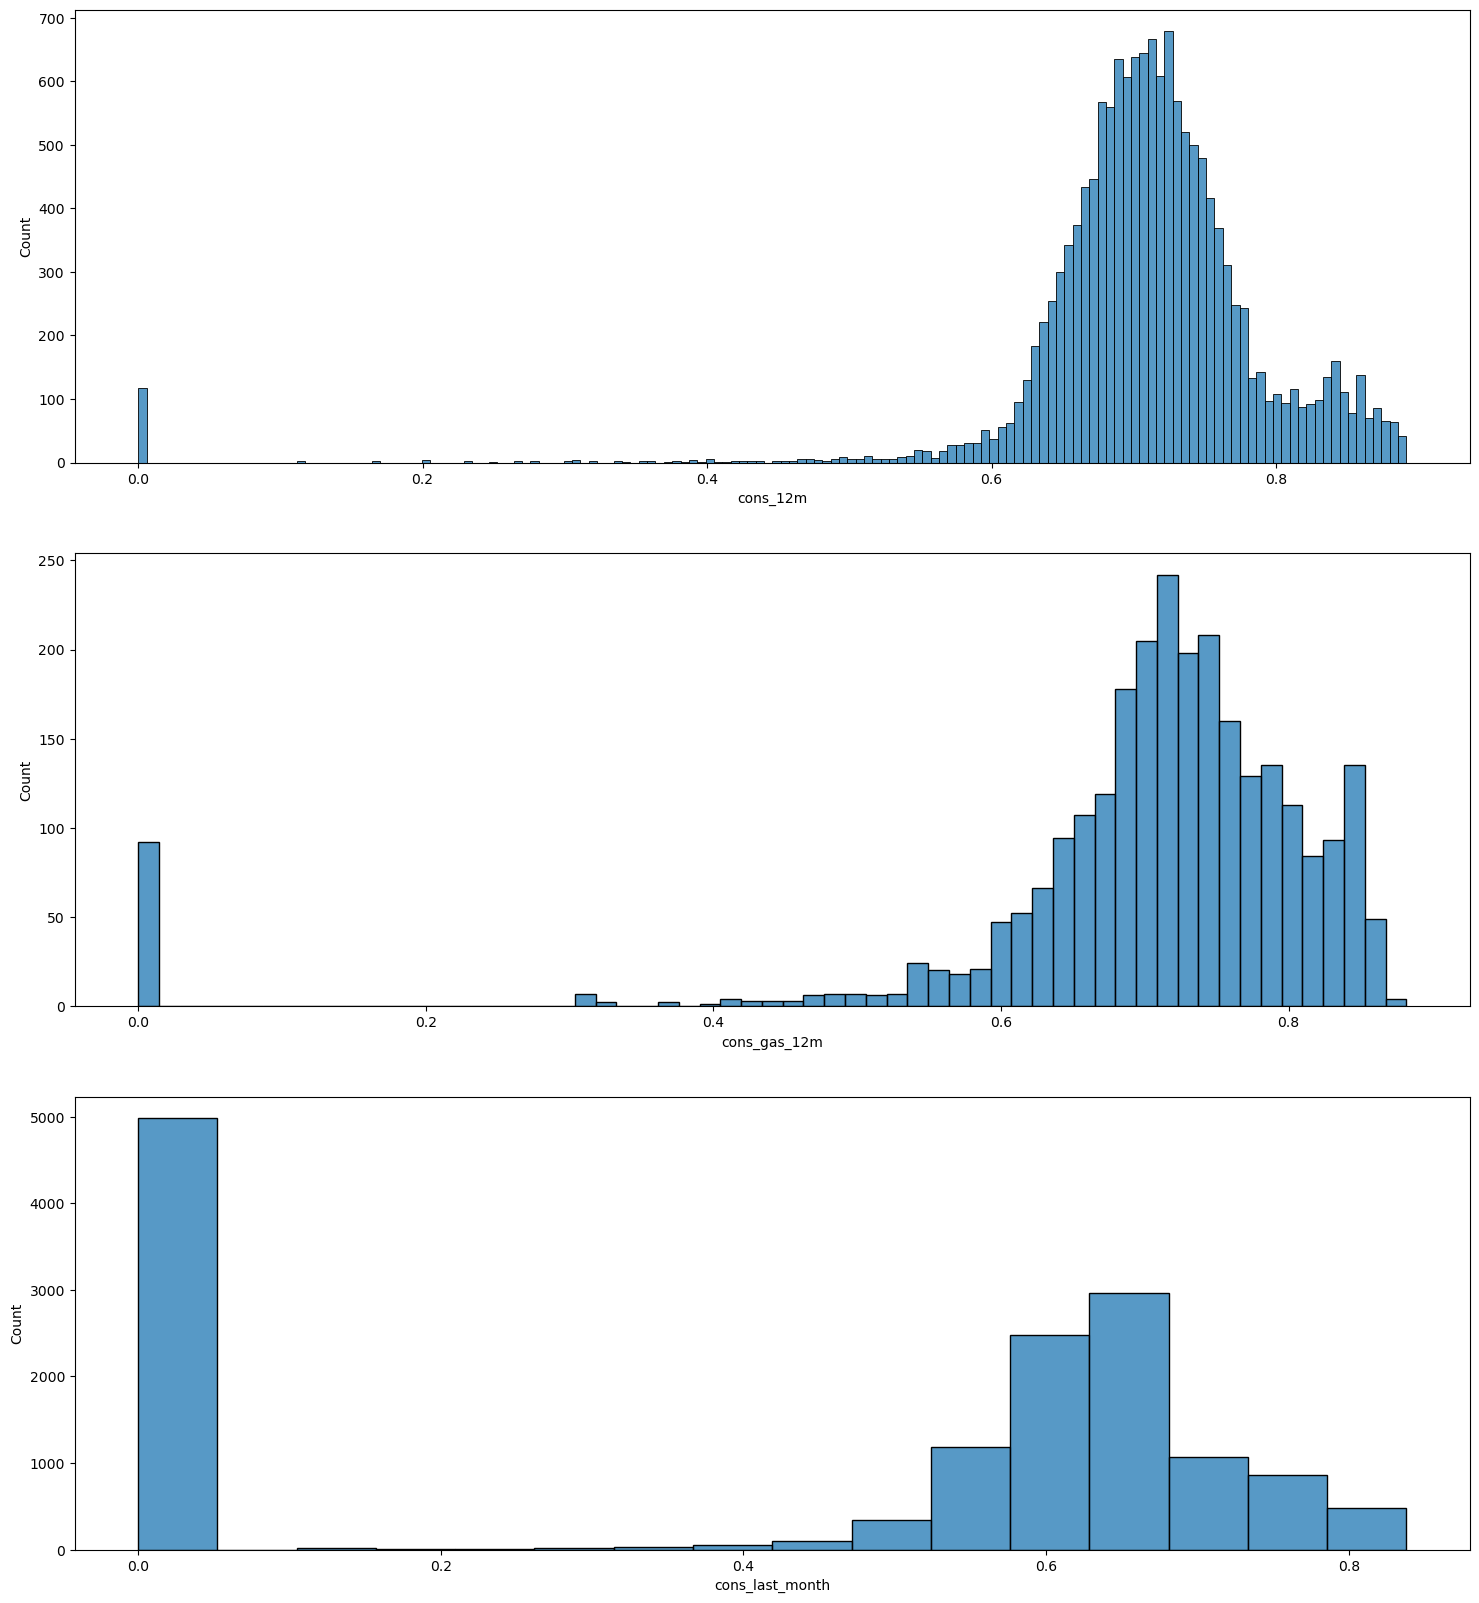

In [108]:
# check the distribution of these features
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.histplot((features["cons_12m"].dropna()), ax=axs[0])
sns.histplot((features[features["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.histplot((features["cons_last_month"].dropna()), ax=axs[2])
plt.show()

In [112]:
# check correlation coefficients of numerical variables
correlation = numerical_vars.corr()

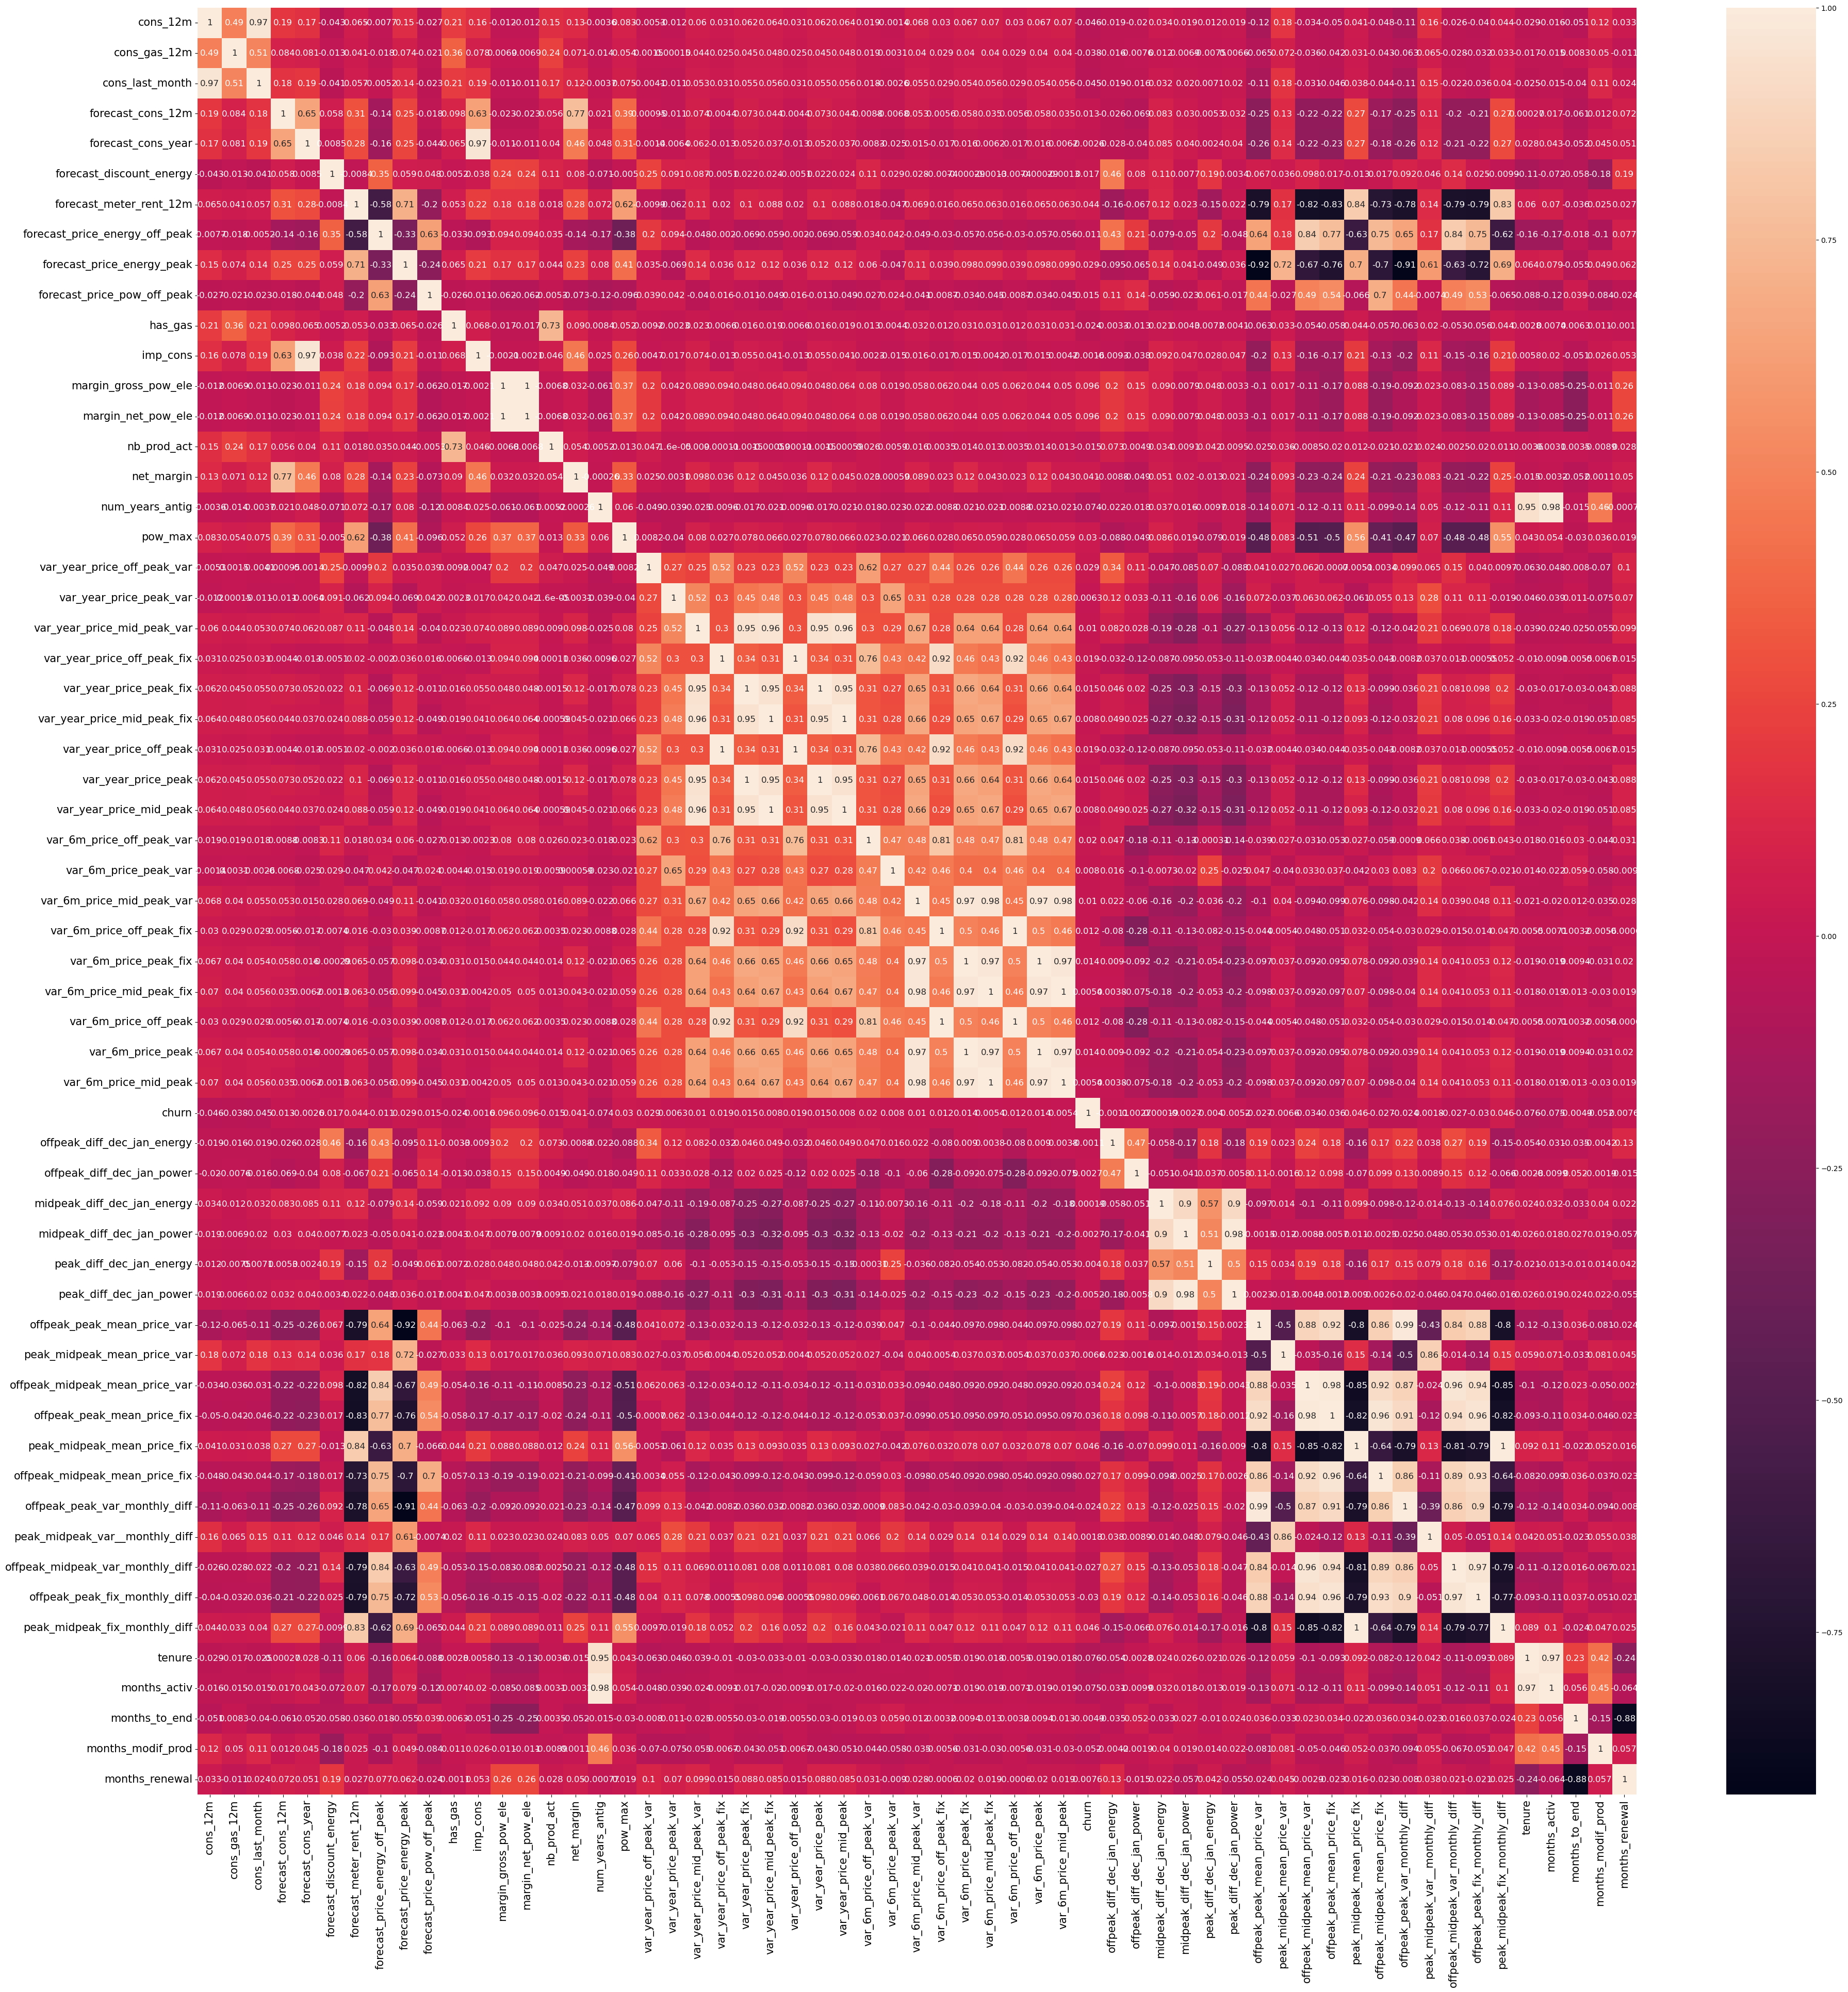

In [113]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [114]:
features = features.drop(columns=['num_years_antig', 'forecast_cons_year'])
features.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      0.758908         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  0.669175      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  0.572453      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  0.623252      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  0.667080      0.000000         0.570754   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.159581   
1           0.000000                       0.0                 0.349723   
2           0.000000                       0.0                 0.414808   
3           0.000000                       0.0                 0.365243   
4           0.196108                       0.0                 0.494568   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  1               6   
1                    44.311378  ...                 74               3   
2                    44.311378  ...                 67               8   
3                    44.311378  ...                 67               8   
4                    40.606701  ...                 70               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                    False   
1                                     True   
2                                     True   
3                                     True   
4                                     True   

   origin_ldkssxwpmemidmecebumciepifcamkci  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   origin_lxidpiddsbxsbosboudacockeimpuepw  
0                                     True  
1                                    False  
2                                    False  
3                                    False  
4                                    False  

[5 rows x 66 columns]